In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

train_dir = '/kaggle/input/fruit-classify/dataset/train'

validation_dir = '/kaggle/working/validation/'
os.makedirs(validation_dir, exist_ok=True)

#preprocessing
train_datagen = ImageDataGenerator( rescale=1./255,
    validation_split=0.1,
)

target_size = (224, 224)
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'  
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation'  
)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 8910 images belonging to 5 classes.
Found 990 images belonging to 5 classes.


In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from traitlets import validate
import sklearn.model_selection
import numpy as np
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [13]:
pip install plot_keras_history


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9455 sha256=e3ec8adb051423714b203e4586e550f511199c6ecfb93af15fe65b765b99067f
  Stored in directory: /root/.cache/pip/wheels/2f/31/6c/bbc9703b7baa8bd3802a8aedd9e2f9e66941b0cf0d456ab4cc
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.51-py3-none-any.whl size=321865 sha256=ea35373a57bff9f2f4821fd0e2e4e6be5f1d9fce5ab57f6ed7fd19b0fa67fc1a
  Stored in directory: /root/.cache/pip/wheels/30/9f/f5/37d037c39ac8b305590d5956f7021c6ca94b63c68be24f6841
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl size=5629 sha256=bb7febe866e896b2e3c53b1e2a4f4e67f9c01d60bcf0d245d6c980e50deb278a
  Stored in director

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126 (Conv2D)         (None, 112, 112, 32)      896       
                                                                 
 batch_normalization_126 (B  (None, 112, 112, 32)      128       
 atchNormalization)                                              
                                                                 
 activation_126 (Activation  (None, 112, 112, 32)      0         
 )                                                               
                                                                 
 conv2d_127 (Conv2D)         (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_127 (B  (None, 112, 112, 64)      256       
 atchNormalization)                                              
                                                      

NameError: name 'history' is not defined

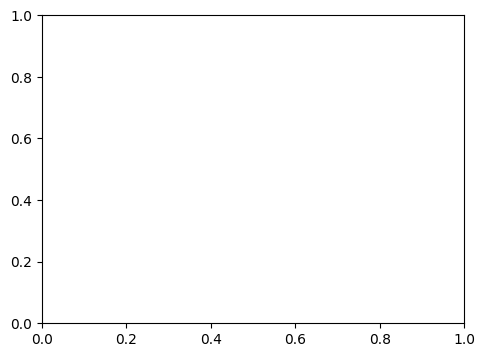

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense
from plot_keras_history import show_history, plot_history


model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Block 2
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Block 3
model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Block 4
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Block 5
model.add(Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Block 6
model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Block 7
model.add(Conv2D(512, (3, 3), strides=(2, 2), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Five blocks without loops
for _ in range(5):
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

# Block 13
model.add(Conv2D(1024, (3, 3), strides=(2, 2), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Block 14
model.add(Conv2D(1024, (3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(GlobalAveragePooling2D())
model.add(Dense(5, activation='softmax'))

optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



earlyStopping = EarlyStopping(patience=15, min_delta=0.001, monitor="val_loss", restore_best_weights=True)
cp = ModelCheckpoint('bestt_mobil_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


model.summary()

history = model.fit(train_generator,
          steps_per_epoch=277,
          epochs=2,
          validation_data=validation_generator,
          validation_steps=30,
          callbacks=[earlyStopping, cp])
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
